In [6]:
from data_loader import WireDataset
import torch
import math
import numpy as np
from torch.utils.data import DataLoader
from ML import Net
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.classification import F1Score


In [7]:
dataset = WireDataset("Input_Data.csv")
# TODO add to device

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [8]:
generator = torch.Generator().manual_seed(4)

train_fraction = math.floor(len(dataset)*0.7)
test_fraction = len(dataset) - train_fraction

test_data_ind, train_data_ind = torch.utils.data.random_split(dataset, [test_fraction, train_fraction], generator = generator)

dl_train = DataLoader(train_data_ind, batch_size=20, shuffle=True) #todevice
dl_test = DataLoader(test_data_ind, batch_size=20, shuffle=True) #todevice

net = Net() #todevice
#optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 100

In [9]:
epochs_F1List = np.zeros((2, 100))
F1= F1Score("multiclass", num_classes = 5)
f1_max = 0

In [10]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    net.train()
    for i, data in enumerate(dl_train, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 30 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0
    
    predictions_list = [] #list for predictions (predicted number of label)
    values_list = []      #list for values (actual number of label)
    f1_list = np.zeros(len(dl_test))
    net.eval()
    running_loss = 0.0
    for i, data in enumerate(dl_test, 0):
        inputs, labels = data
        # forward + backward + optimize
        outputs = net(inputs)
        f1_list[i] = F1(outputs, labels).item()
        if i % 10 == 9:    # print every 10 mini-batches
            print(f"[batch {i}, size: {dl_test.batch_size}] F1 score: {f1_list[i]}")
    
    epochs_F1List[0][epoch] = f1_list.mean()
    epochs_F1List[1][epoch] = f1_list.std()
    
    if epochs_F1List[0][epoch] > f1_max:
        torch.save(net.state_dict(), "model.ebr")
        f1_max=epochs_F1List[0][epoch]

[1,    10] loss: 1.651
[1,    20] loss: 1.641
[1,    30] loss: 1.609
[1,    40] loss: 1.585
[1,    50] loss: 1.562
[1,    60] loss: 1.530
[1,    70] loss: 1.513
[1,    80] loss: 1.477
[1,    90] loss: 1.421
[1,   100] loss: 1.351
[1,   110] loss: 1.253
[1,   120] loss: 1.192
0.550000011920929
0.5
0.20000000298023224
0.44999998807907104
0.6000000238418579
[2,    10] loss: 1.242
[2,    20] loss: 1.221
[2,    30] loss: 1.284
[2,    40] loss: 1.164
[2,    50] loss: 1.288
[2,    60] loss: 1.342
[2,    70] loss: 1.292
[2,    80] loss: 1.240
[2,    90] loss: 1.124
[2,   100] loss: 1.254
[2,   110] loss: 1.243
[2,   120] loss: 1.220
0.6499999761581421
0.5
0.44999998807907104
0.44999998807907104
0.6499999761581421
[3,    10] loss: 1.177
[3,    20] loss: 1.227
[3,    30] loss: 1.228
[3,    40] loss: 1.291
[3,    50] loss: 1.151
[3,    60] loss: 1.173
[3,    70] loss: 1.310
[3,    80] loss: 1.261
[3,    90] loss: 1.247
[3,   100] loss: 1.209
[3,   110] loss: 1.245
[3,   120] loss: 1.204
0.5500000

Finished Training
0.9071428520338876
[0.06008072]


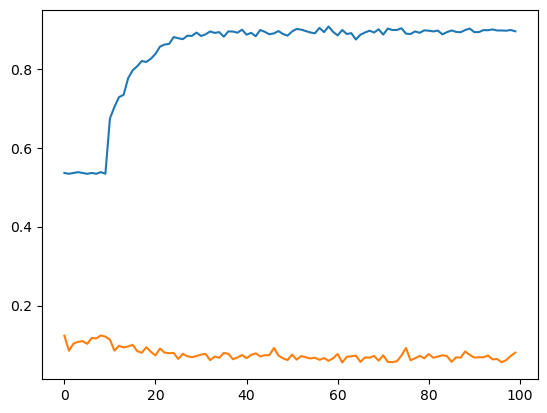

In [16]:
print('Finished Training')


plt.plot(epochs_F1List[0])
plt.plot(epochs_F1List[1])
print(epochs_F1List[0].max())

ind = np.where(epochs_F1List[0]==epochs_F1List[0].max())
print(epochs_F1List[1][ind])
plt.savefig("f1.png")

In [14]:
len(dl_test)

56